In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

# Random Forests

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=0)

In [5]:
train_scores = []
test_scores = []

rf = RandomForestClassifier(warm_start=True)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

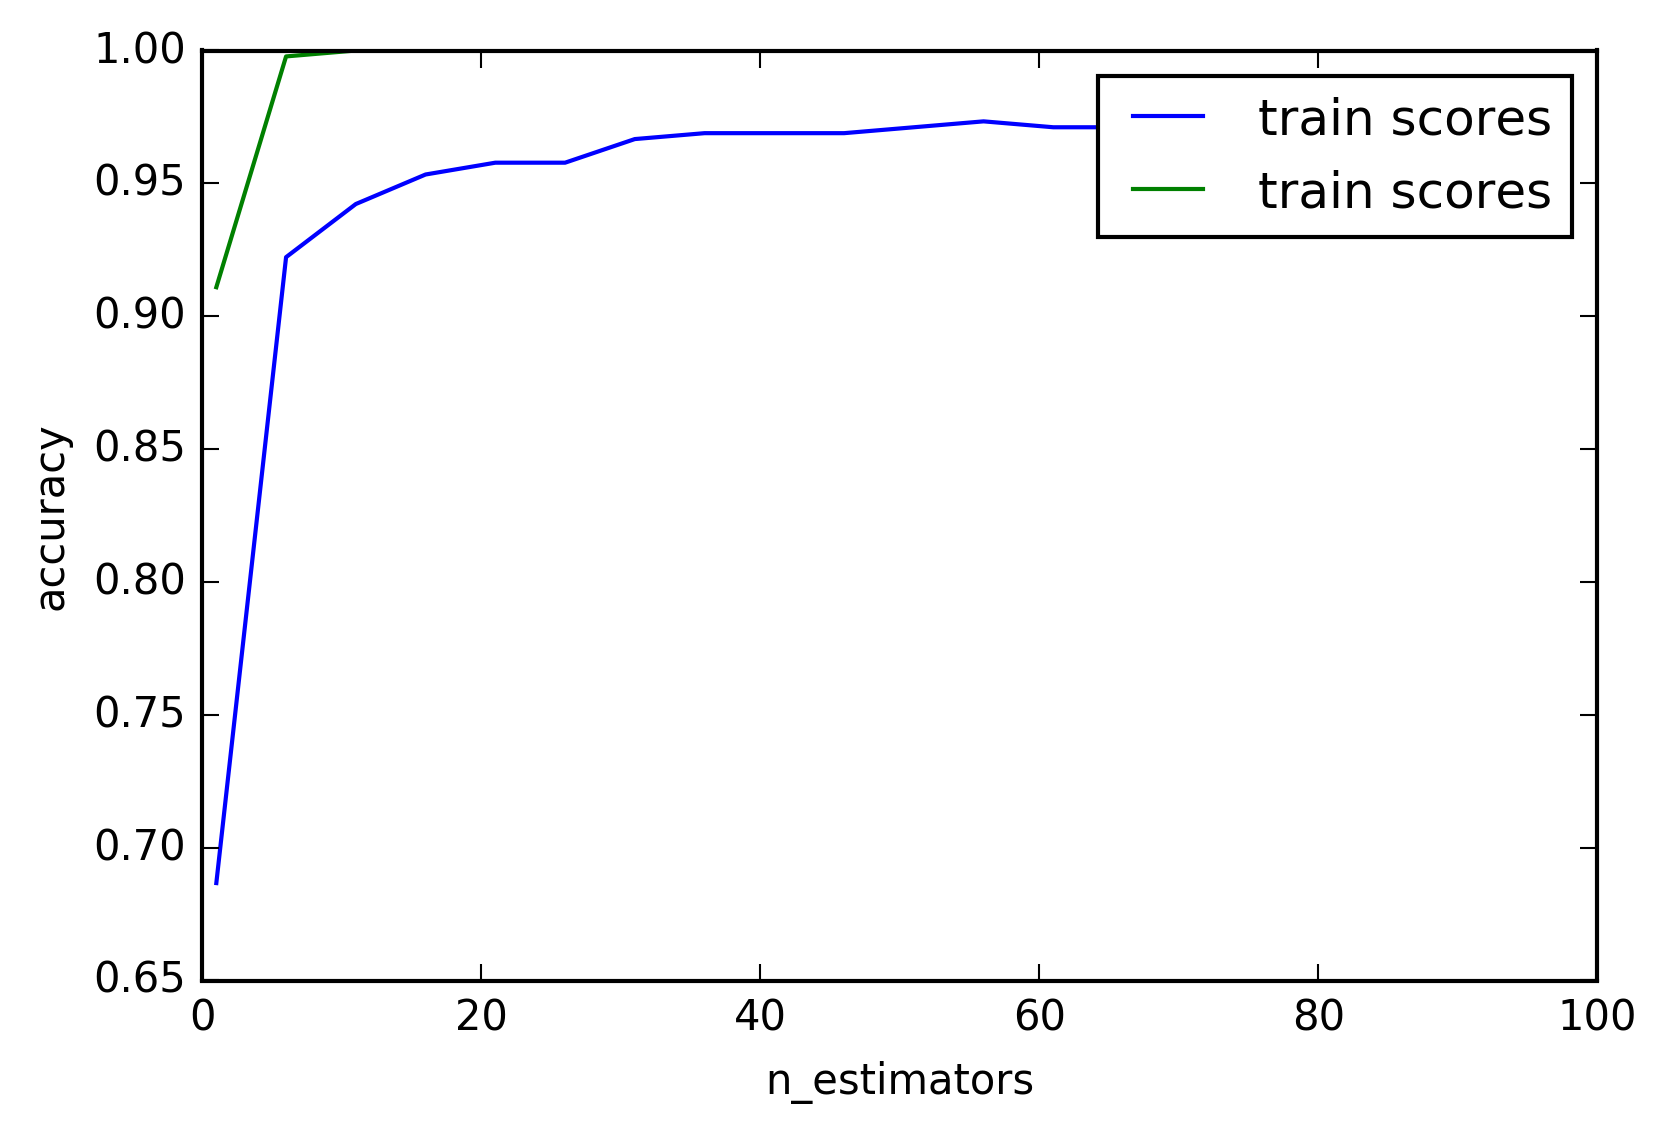

In [7]:
plt.plot(estimator_range, test_scores, label="train scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend();

In [8]:
train_scores = []
test_scores = []
oob_scores = []

feature_range = range(1, 64, 5)
for max_features in feature_range:
    rf = RandomForestClassifier(max_features=max_features, oob_score=True, n_estimators=200, random_state=0)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    oob_scores.append(rf.oob_score_)

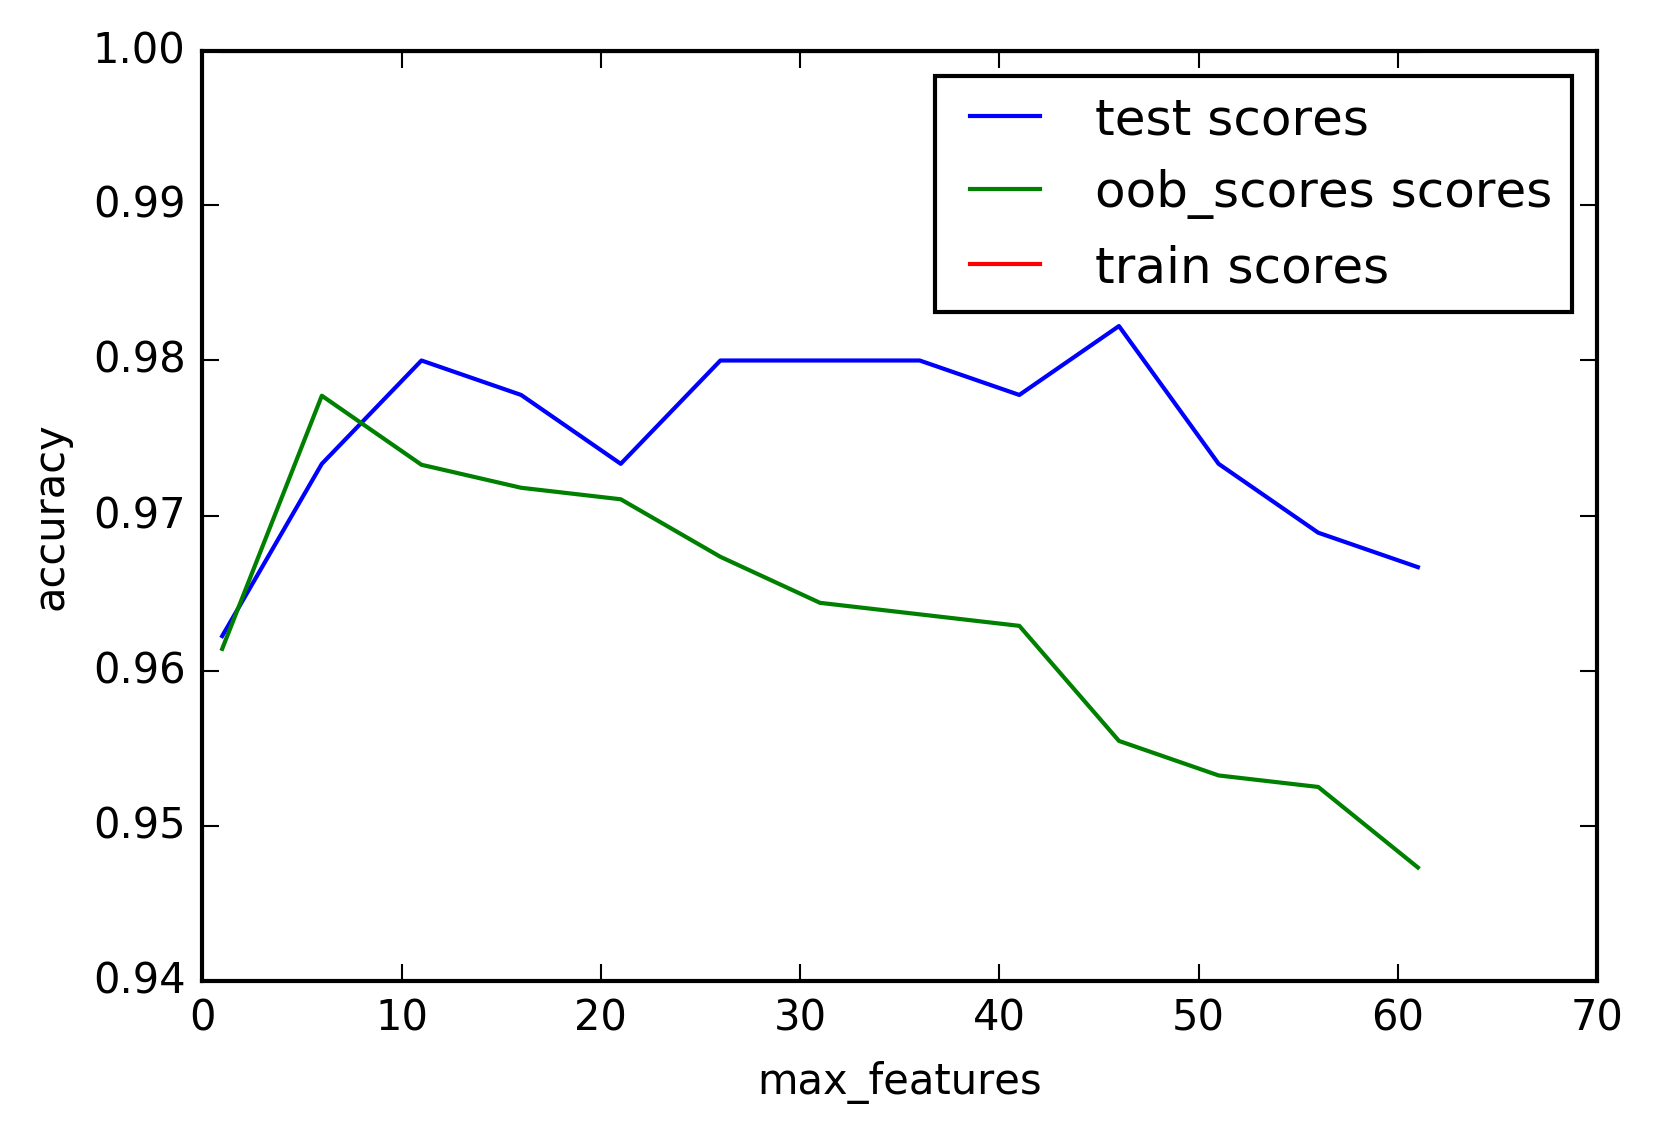

In [13]:
plt.plot(feature_range, test_scores, label="test scores")
plt.plot(feature_range, oob_scores, label="oob_scores scores")
plt.plot(feature_range, train_scores, label="train scores")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("max_features");

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=1)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [15]:
rf.feature_importances_

array([ 0.067,  0.013,  0.065,  0.076,  0.005,  0.005,  0.041,  0.1  ,
        0.005,  0.006,  0.005,  0.005,  0.011,  0.031,  0.004,  0.004,
        0.003,  0.003,  0.004,  0.004,  0.087,  0.018,  0.105,  0.099,
        0.009,  0.023,  0.048,  0.138,  0.012,  0.005])

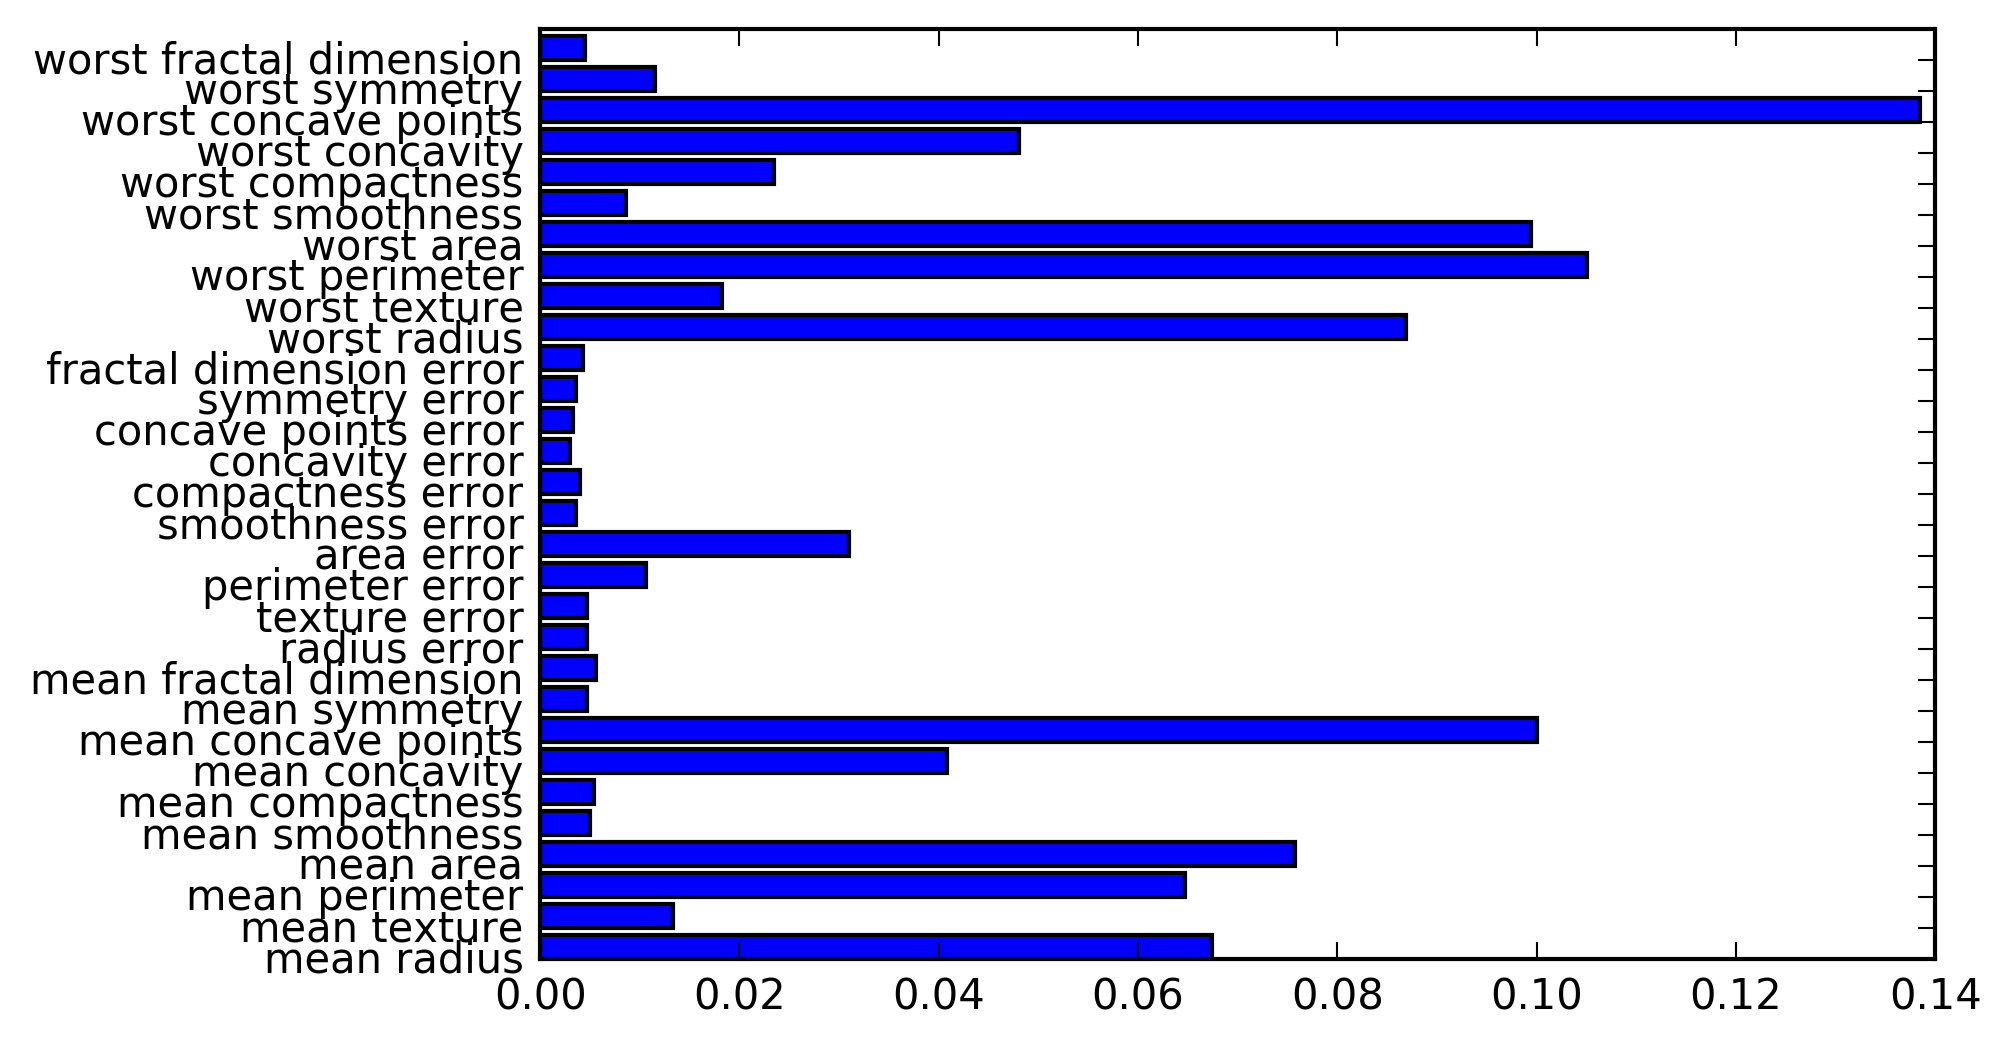

In [16]:
plt.barh(range(len(cancer.feature_names)), rf.feature_importances_)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names);

#pd.Series(rf.feature_importances_, index=cancer.feature_names).plot(kind="barh")

# Exercise
Use a random forest classifier or random forest regressor on a dataset of your choice.
Try different values of n_estimators and max_depth and see how they impact performance and runtime.
Tune ``max_features`` with GridSearchCV.

Let's try with Digits

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=0)

In [19]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

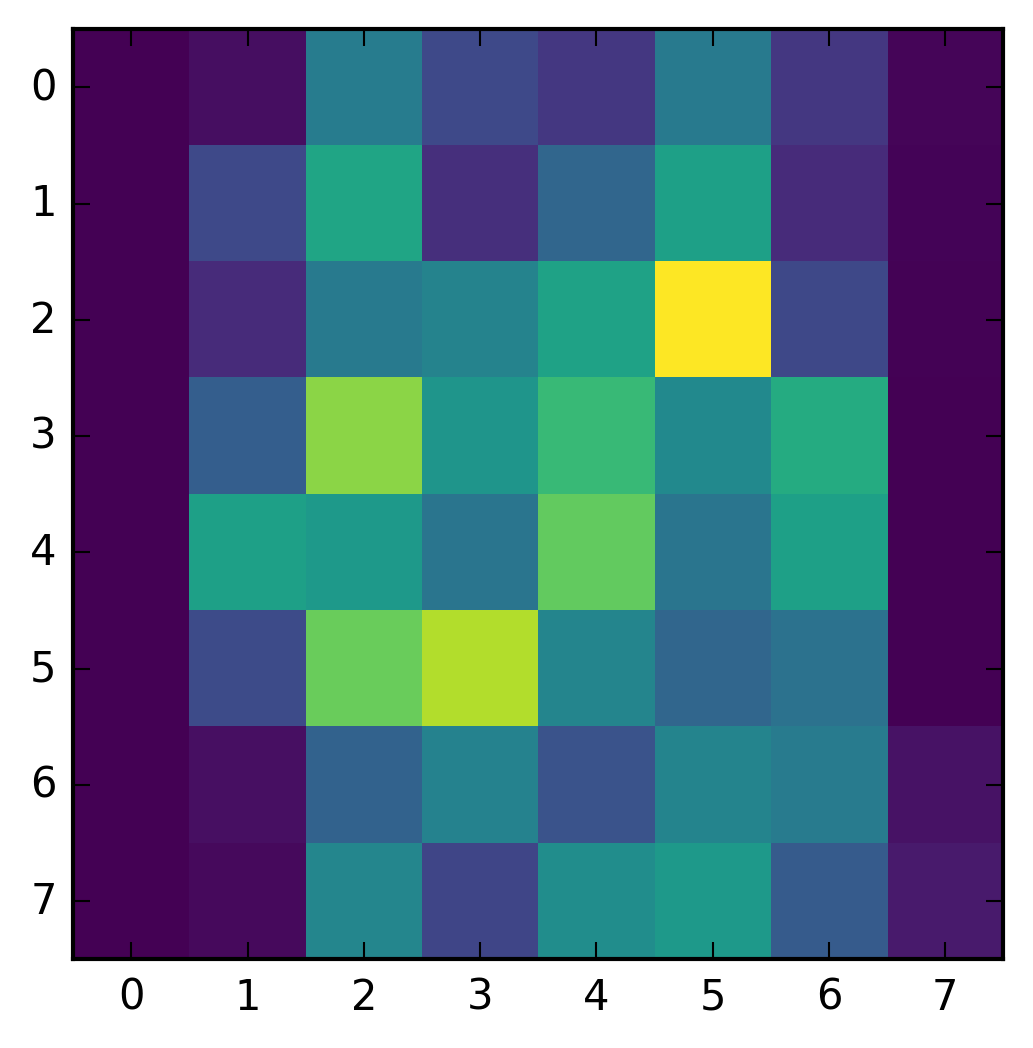

In [20]:
plt.imshow(np.reshape(rf.feature_importances_, (8,8)), interpolation="nearest", cmap=plt.cm.viridis);

Let's try with Boston data (a RandomForestRegressor with different n_estimators and max_depth)

In [21]:
from sklearn.datasets import load_boston
boston = load_boston()

In [22]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':np.arange(10, 200,10)}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, verbose=1)
grid.fit(X, y)

Fitting 10 folds for each of 19 candidates, totalling 190 fits


[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:  1.1min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [24]:
grid.best_params_

{'n_estimators': 90}

In [25]:
param_grid = {'max_depth':np.arange(2, 7)}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=10, verbose=1)
grid.fit(X, y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([2, 3, 4, 5, 6])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [26]:
grid.best_params_

{'max_depth': 6}

In [27]:
param_grid = {'max_features':np.arange(1, X.shape[1])}
grid = GridSearchCV(RandomForestRegressor(max_depth=6, n_estimators=50), param_grid, cv=10, verbose=1)
grid.fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   10.9s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

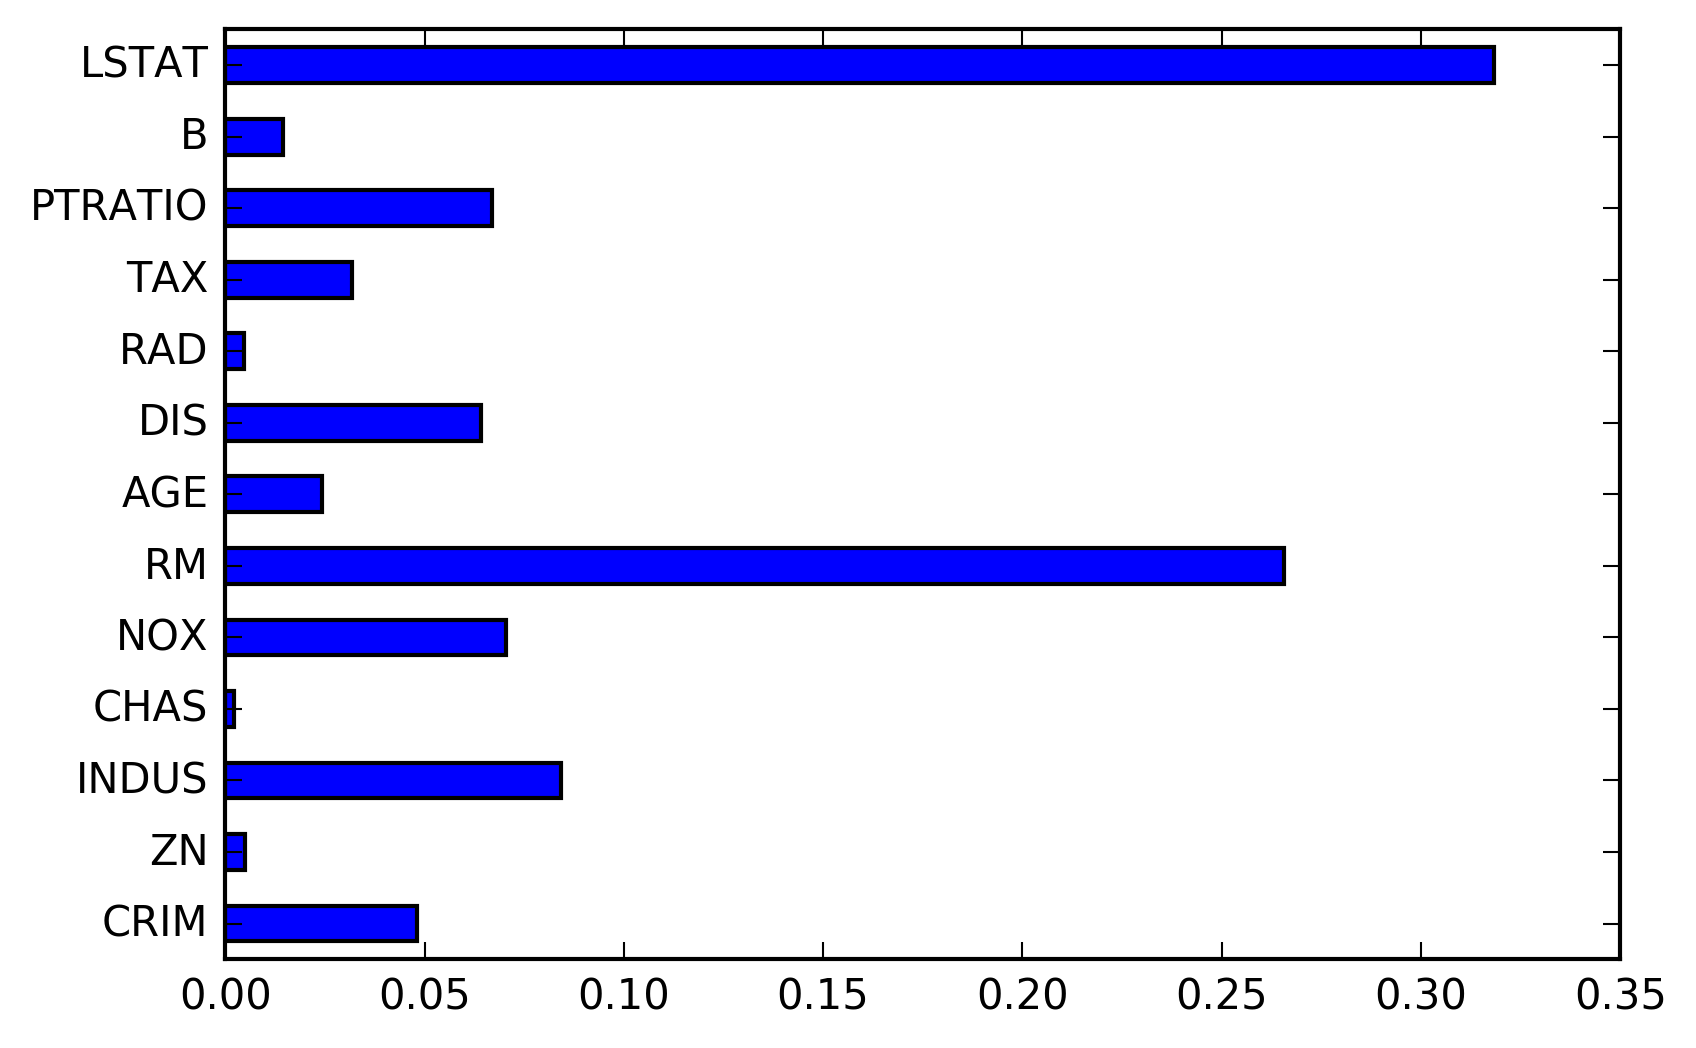

In [28]:
rf = grid.best_estimator_
pd.Series(rf.feature_importances_, index=boston.feature_names).plot(kind="barh");